In [1]:
%cd /Users/gwg/local/dmcm
%matplotlib inline

/Users/gwg/local/dmcm


In [28]:
import random

from   sklearn import manifold, decomposition
from   sklearn import manifold, decomposition

from   scipy.spatial.distance import cdist

import matplotlib
import matplotlib.pyplot as plt
from   matplotlib.offsetbox import OffsetImage, AnnotationBbox

import torch
from   torch.autograd import Variable
from   torchvision.utils import save_image

from   models import load_trained_model
from   data.synth.config import SynthConfig
from   data import SynthDataset

config  = SynthConfig()
dataset = SynthDataset(config)
dir_    = '/Users/gwg/local/dmcm/experiments/20180318_double_vae/'\
          'synth_l1_coef-1000.0_lr-0.0001'
fname   = '%s/model.pt' % dir_
model   = load_trained_model(config, fname, cpu=True)

model.eval()

Z = torch.load('%s/K1.pt' % dir_)

In [31]:
def image_scatter(points, images, colors, ax):
    images = images.numpy()
    colors = colors.numpy()
    for (x, y), image, color in zip(points, images, colors):

        # Set colors back to RGB
        image[0][image[0] == 0] = color[0]
        image[1][image[1] == 0] = 0  # Ignore the green channel. It's just noise.
        image[2][image[2] == 0] = color[2]
        
        im = OffsetImage(image.T, zoom=0.5)
        ab = AnnotationBbox(im, (x, y), frameon=True, pad=0.4)
        ax.add_artist(ab)

PCA completed


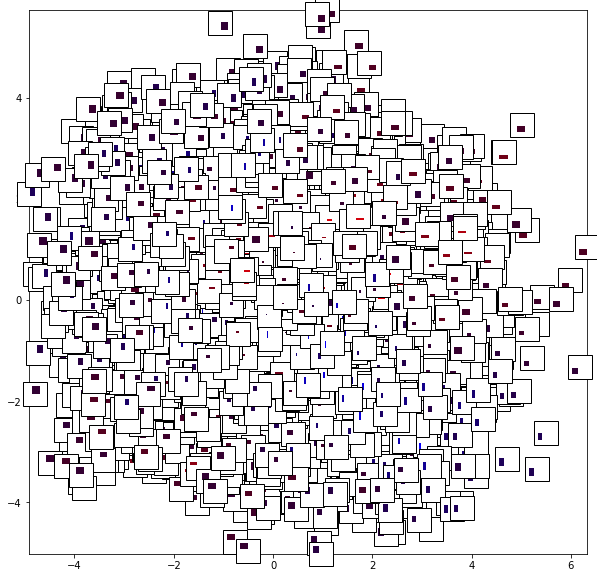

In [30]:
fig, ax = plt.subplots(1, sharex=True, dpi=72)
fig.set_size_inches(10, 10)  # Width, height

N = 5000
Z = Z[:N, :]

# compressor = manifold.TSNE(n_components=2, init='pca', random_state=0)
compressor = decomposition.PCA(n_components=2)
points = compressor.fit_transform(Z)
print('%s completed' % compressor.__class__.__name__)

Xp = points[:, 0]
Yp = points[:, 1]
colors = dataset.colors[:N, :3].numpy()

xmin = Xp.min()
xmax = Xp.max()
ymin = Yp.min()
ymax = Yp.max()
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

# ax.scatter(Xp, Yp, c=colors)
image_scatter(points, dataset.images, dataset.colors, ax)

In [35]:
# n = 10
# emb = torch.Tensor(n, 3, 32, 32)
# for i in range(n):
for i in range(100):
    #     r = random.randint(0, len(dataset))

    x1, x2, _ = dataset[i]
    x1        = Variable(x1)
    x2        = Variable(x2)
    
    print(x2.data)
    w = x2[0]
    h = x2[2]
    print(w, h)

#     (z1, x1_recon, mu, logvar), z2 = model.forward([x1, x2])
#     # print(z1.sum())
#     # z2 /= z2.sum()
#     x1_recon   = x1_recon.view(3, 32, 32)
#     x1_from_x2 = model.conv_net.decode(z2).view(3, 32, 32)

#     save_image(x1.data,         'scratch/vae/%s_image_real.png' % i)
#     save_image(x1_recon.data,   'scratch/vae/%s_image_recon.png' % i)
#     save_image(x1_from_x2.data, 'scratch/vae/%s_image_gen.png' % i)


 0.3360
 0.0764
 0.1191
 0.2123
 0.3407
 0.7781
 0.8669
 0.9452
 0.7267
 0.1855
[torch.FloatTensor of size 10]

Variable containing:
 0.3360
[torch.FloatTensor of size 1]
 Variable containing:
 0.1191
[torch.FloatTensor of size 1]


 0.1636
 0.0860
 0.2447
 0.2872
 0.8986
 0.0883
 0.0320
 0.4725
 0.6944
 0.4356
[torch.FloatTensor of size 10]

Variable containing:
 0.1636
[torch.FloatTensor of size 1]
 Variable containing:
 0.2447
[torch.FloatTensor of size 1]


 0.3339
 0.8651
 0.1199
 0.5517
 0.2849
 0.9001
 0.2289
 0.1504
 0.6762
 0.8087
[torch.FloatTensor of size 10]

Variable containing:
 0.3339
[torch.FloatTensor of size 1]
 Variable containing:
 0.1199
[torch.FloatTensor of size 1]


 0.1702
 0.4000
 0.2351
 0.5287
 0.6451
 0.4703
 0.5192
 0.5632
 0.3467
 0.4593
[torch.FloatTensor of size 10]

Variable containing:
 0.1702
[torch.FloatTensor of size 1]
 Variable containing:
 0.2351
[torch.FloatTensor of size 1]


 0.7794
 0.9341
 0.0514
 0.5306
 0.9367
 0.1354
 0.8987
 0.9635
 0.